In [2]:
print("aashnaDOGRA")

aashnaDOGRA


In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
csv_path = "/content/dataset.csv"
df = pd.read_csv(csv_path)
df_filtered = df.copy()
df_filtered.dropna(inplace=True)
df_filtered = df_filtered[df_filtered['JAHR'] <= 2020]


### **SARIMA Model**

In [4]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
<

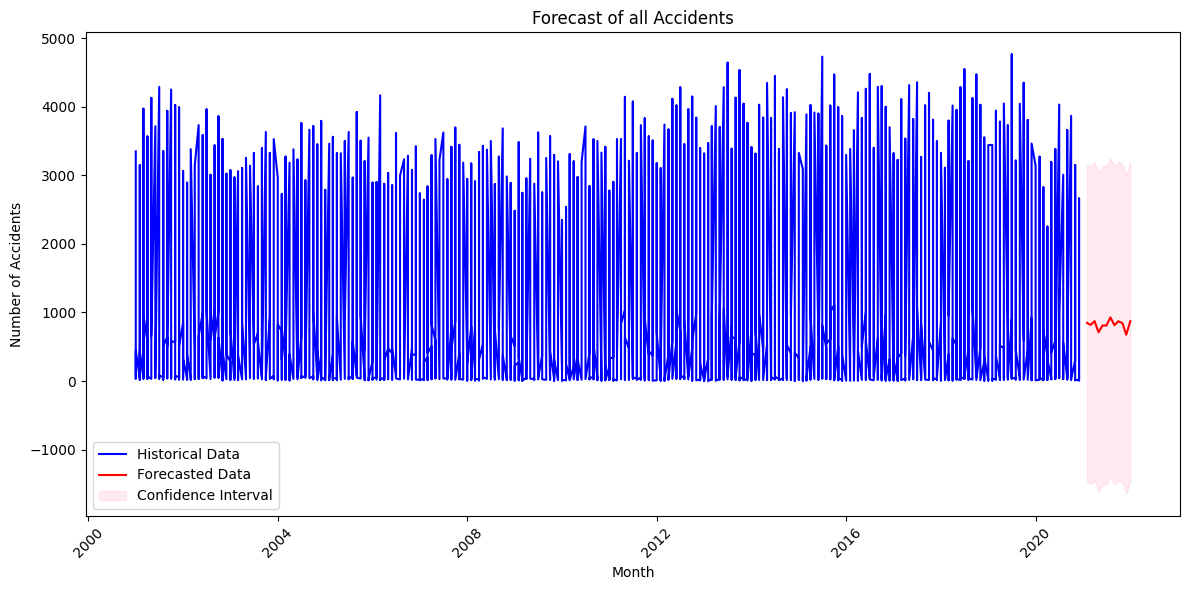

In [19]:
filtered = df_filtered[df_filtered['MONAT'] != 'Summe']

filtered['date'] = pd.to_datetime(filtered['MONAT'], format='%Y%m')
filtered.set_index('date', inplace=True)

filtered.sort_index(inplace=True)

# Prepare time series
y = filtered['WERT']
sarima_model = SARIMAX(y,
                       order=(1, 1, 1),
                       seasonal_order=(1, 1, 1, 12),
                       enforce_stationarity=False,
                       enforce_invertibility=False)
sarima_result = sarima_model.fit()

forecast_steps = 12
forecast = sarima_result.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=y.index[-1] + pd.DateOffset(months=1),
                                periods=forecast_steps,
                                freq='M')

plt.figure(figsize=(12, 6))
plt.plot(y.index, y.values, label='Historical Data', color='blue')
plt.plot(forecast_index, forecast.predicted_mean, label='Forecasted Data', color='red')
plt.fill_between(forecast_index,
                 forecast.predicted_mean - 1.96 * forecast.se_mean,
                 forecast.predicted_mean + 1.96 * forecast.se_mean,
                 color='pink', alpha=0.3, label='Confidence Interval')
plt.title('Forecast of all Accidents')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Targeting on
- Category: Alkoholunfälle
- Accident-type: insgesamt

In [20]:
subset = df_filtered[(df_filtered['MONATSZAHL'] == 'Alkoholunfälle') & (df_filtered['AUSPRAEGUNG'] == 'insgesamt')]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-76-6372186c684e>:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=y.index[-1] + pd.DateOffset(months=1),


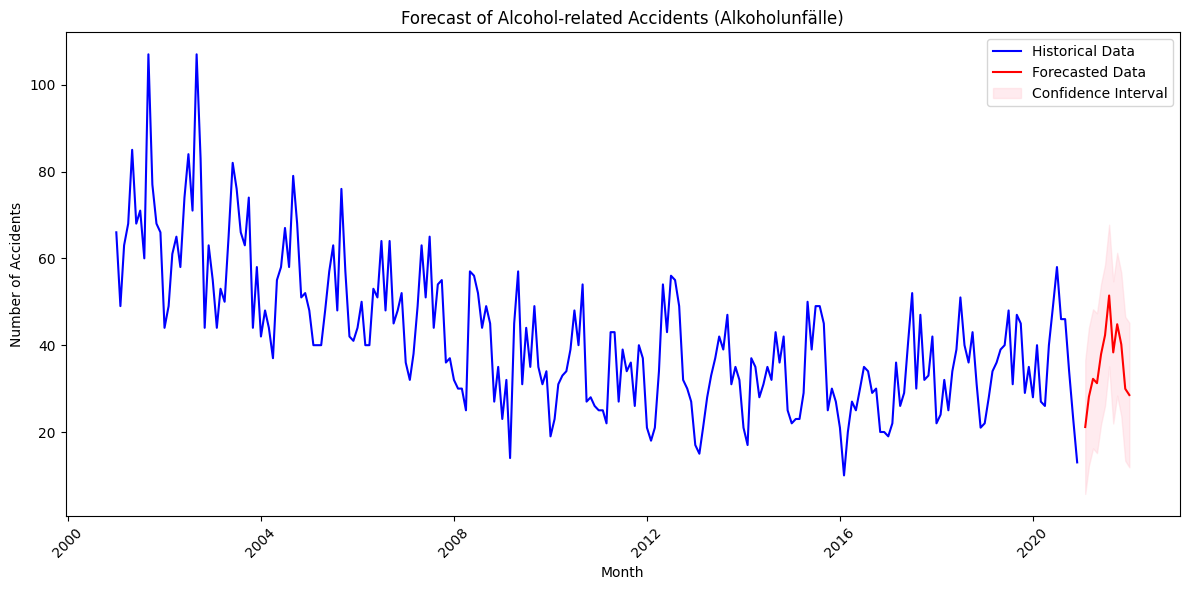

In [76]:
filtered_data = subset[subset['MONAT'] != 'Summe']

filtered_data['date'] = pd.to_datetime(filtered_data['MONAT'], format='%Y%m')
filtered_data.set_index('date', inplace=True)

filtered_data.sort_index(inplace=True)

# Prepare time series
y = filtered_data['WERT']
sarima_model = SARIMAX(y,
                       order=(1, 1, 1),
                       seasonal_order=(1, 1, 1, 12),
                       enforce_stationarity=False,
                       enforce_invertibility=False)
sarima_result = sarima_model.fit()

forecast_steps = 12
forecast = sarima_result.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=y.index[-1] + pd.DateOffset(months=1),
                                periods=forecast_steps,
                                freq='M')

plt.figure(figsize=(12, 6))
plt.plot(y.index, y.values, label='Historical Data', color='blue')
plt.plot(forecast_index, forecast.predicted_mean, label='Forecasted Data', color='red')
plt.fill_between(forecast_index,
                 forecast.predicted_mean - 1.96 * forecast.se_mean,
                 forecast.predicted_mean + 1.96 * forecast.se_mean,
                 color='pink', alpha=0.3, label='Confidence Interval')
plt.title('Forecast of Alcohol-related Accidents (Alkoholunfälle)')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('sarima_time-series.png', bbox_inches='tight', dpi=300)
plt.show()

In [78]:

test_data = filtered_data[-forecast_steps:]
test_df = test_data.reset_index()[['date', 'WERT']].rename(columns={'date': 'ds', 'WERT': 'y'})

test_future = sarima_result.get_forecast(steps=forecast_steps)
y_true = test_df['y']
y_pred = test_future.predicted_mean

# Evaluation Metrics
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = mean_squared_error(y_true, y_pred, squared=False)
r_squared = r2_score(y_true, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared: {r_squared}")


Mean Absolute Error (MAE): 6.8323101963478905
Mean Squared Error (MSE): 60.1710241489346
Root Mean Squared Error (RMSE): 7.756998398152123
R-squared: 0.6057949282326396


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [80]:
#Prediction

year_to_forecast = 2021
month_to_forecast = 1  # January

forecasted_value = forecast.predicted_mean[(forecast_index.year == year_to_forecast) &
                                           (forecast_index.month == month_to_forecast)].values

if len(forecasted_value) > 0:
    forecasted_value_january_2021 = forecasted_value[0]
    print(f"Predicted number of 'Alkoholunfälle' for {month_to_forecast} {year_to_forecast} by SARIMA: {forecasted_value_january_2021}")
else:
    print(f"No forecast available for {month_to_forecast}/{year_to_forecast}.")

Predicted number of 'Alkoholunfälle' for 1 2021 by SARIMA: 21.146316233677098


### **Prophet Model**

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvp7xgq_t/yzl1qms7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvp7xgq_t/gq19_r19.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85088', 'data', 'file=/tmp/tmpvp7xgq_t/yzl1qms7.json', 'init=/tmp/tmpvp7xgq_t/gq19_r19.json', 'output', 'file=/tmp/tmpvp7xgq_t/prophet_modelsr3bgxs0/prophet_model-20241129075736.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:57:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:57:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/

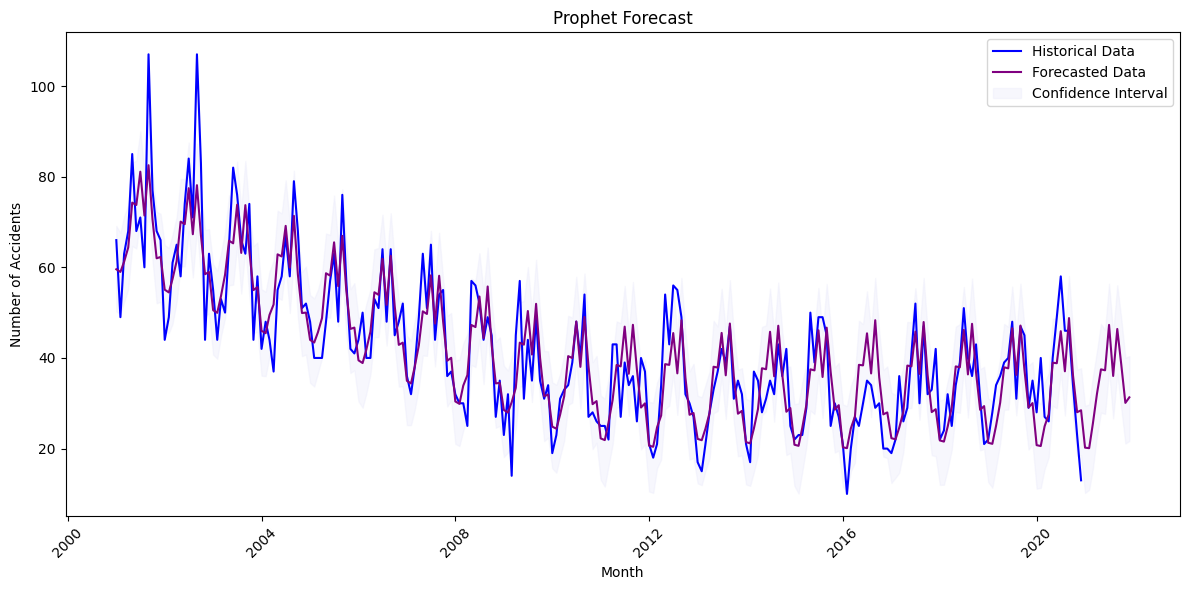

In [82]:
prophet_data = filtered_data.reset_index()[['date', 'WERT']].rename(columns={'date': 'ds', 'WERT': 'y'})

prophet_model = Prophet()
prophet_model.fit(prophet_data)

# Forecast
forecast_steps = 12
future = prophet_model.make_future_dataframe(periods=forecast_steps, freq='M')
forecast = prophet_model.predict(future)

# Visualization
plt.figure(figsize=(12, 6))
plt.plot(prophet_data['ds'], prophet_data['y'], label='Historical Data', color='blue')
plt.plot(forecast['ds'], forecast['yhat'], label='Forecasted Data', color='purple')
plt.fill_between(forecast['ds'],
                 forecast['yhat_lower'],
                 forecast['yhat_upper'],
                 color='lavender', alpha=0.3, label='Confidence Interval')
plt.title('Prophet Forecast')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('prophet_time-series.png', bbox_inches='tight', dpi=300)
plt.show()


In [83]:
#Evaluation

test_data = filtered_data[-forecast_steps:]

test_df = test_data.reset_index()[['date', 'WERT']].rename(columns={'date': 'ds', 'WERT': 'y'})

test_future = prophet_model.make_future_dataframe(periods=0, freq='M')
test_forecast = prophet_model.predict(test_future)

y_true = test_df['y']
y_pred = test_forecast['yhat'][-forecast_steps:]

r_squared = r2_score(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = mean_squared_error(y_true, y_pred, squared=False)
print("Prophet")
print(f"R-squared: {r_squared}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


Prophet
R-squared: 0.4299439683121612
Mean Absolute Error (MAE): 7.336897908642498
Mean Squared Error (MSE): 87.01271928124095
Root Mean Squared Error (RMSE): 9.328060853212792


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [92]:
# should be 16
jan_2021_prediction = forecast[(forecast['ds'].dt.year == 2021) & (forecast['ds'].dt.month == 1)]
print(jan_2021_prediction[['ds', 'yhat']])
print("Prophet")


            ds       yhat
241 2021-01-31  20.091318
Prophet


### **LSTM Model**

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0996
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0274
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0224
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0187
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0176
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0145
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0141
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0187
Epoch 9/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0171
Epoch 10/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0153
Epoch 11/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0152
Epoch 12/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0139
Epoch 13/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0158
Epoch 14/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0155
Epoch 15/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0132
Epoch 16/20
12/

<ipython-input-85-0a142bd344bf>:49: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=data.index[-1] + pd.DateOffset(months=1),


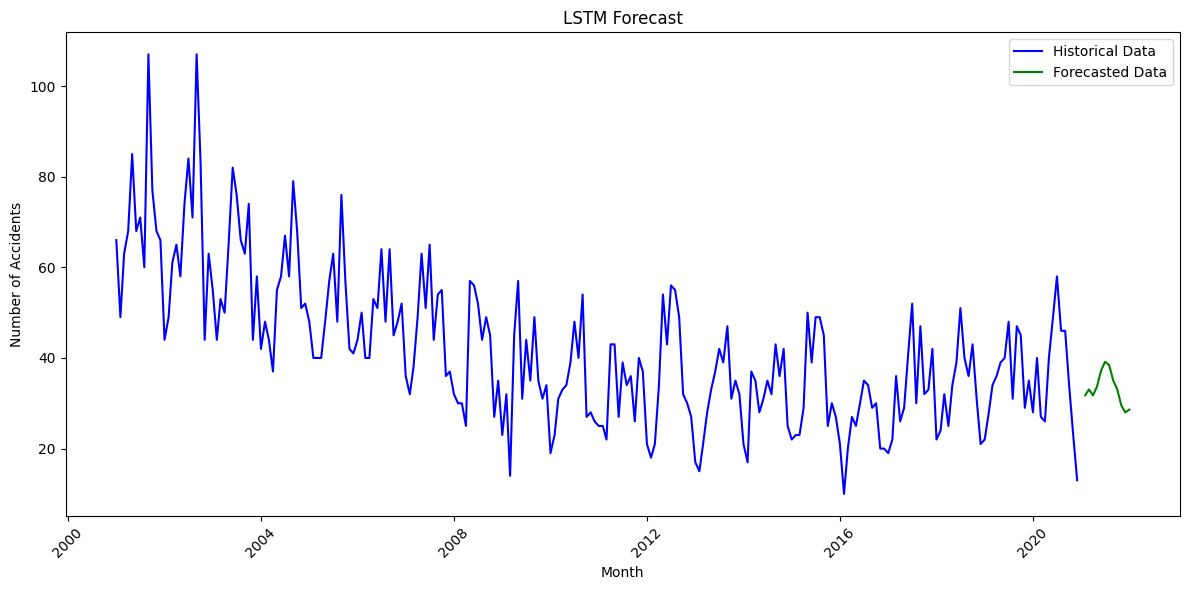

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Prepare the data
data = filtered_data[['WERT']]
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Convert to supervised learning format
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length])
        y.append(data[i + sequence_length])
    return np.array(X), np.array(y)

sequence_length = 12
X, y = create_sequences(data_scaled, sequence_length)

train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(sequence_length, 1), return_sequences=True),
    LSTM(50, activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=20, batch_size=16, verbose=1)

# Forecast future values
last_sequence = data_scaled[-sequence_length:]
future_predictions = []

for _ in range(12):
    prediction = model.predict(last_sequence.reshape(1, sequence_length, 1), verbose=0)
    future_predictions.append(prediction[0][0])
    last_sequence = np.append(last_sequence[1:], prediction)

future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

forecast_index = pd.date_range(start=data.index[-1] + pd.DateOffset(months=1),
                                periods=12,
                                freq='M')

forecast_lstm = pd.DataFrame(future_predictions, columns=['WERT'], index=forecast_index)



# Visualization
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['WERT'], label='Historical Data', color='blue')
plt.plot(forecast_index, future_predictions, label='Forecasted Data', color='green')
plt.title('LSTM Forecast')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('lstm_time-series.png', bbox_inches='tight', dpi=300)
plt.show()


In [86]:
# Evaluation
y_test_pred = model.predict(X_test)
y_test_pred_rescaled = scaler.inverse_transform(y_test_pred)

y_test_rescaled = scaler.inverse_transform(y_test)

r_squared = r2_score(y_test_rescaled, y_test_pred_rescaled)
mae = mean_absolute_error(y_test_rescaled, y_test_pred_rescaled)
mse = mean_squared_error(y_test_rescaled, y_test_pred_rescaled)
rmse = mean_squared_error(y_test_rescaled, y_test_pred_rescaled, squared=False)
print("LSTM Evaluation")
print(f"R-squared: {r_squared}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step  
LSTM Evaluation
R-squared: -0.03911470561140806
Mean Absolute Error (MAE): 7.794226314710534
Mean Squared Error (MSE): 94.995512812993
Root Mean Squared Error (RMSE): 9.746564154254205


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [93]:
jan_2021_prediction = forecast_lstm[(forecast_lstm.index.year == 2021) & (forecast_lstm.index.month == 1)]
print(jan_2021_prediction)
print("LSTM")


                 WERT
2021-01-31  31.758127
LSTM


### **Inference**
- LSTM performs poorly on our dataset
- SARIMA and Prophet predict values nearby to actual value
